In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [3]:
start='2010-09-18'
end='2022-09-18'
df=pdr.get_data_yahoo('AAPL',start='2010-09-18',end='2022-09-18')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-09-20,9.860000,10.135000,9.851786,10.115357,8.585884,658677600
2010-09-21,10.137857,10.262500,10.099643,10.134643,8.602249,668074400
2010-09-22,10.096786,10.285000,10.086071,10.276786,8.722901,585289600
2010-09-23,10.226071,10.455714,10.214286,10.318571,8.758365,786116800
2010-09-24,10.432143,10.483214,10.376786,10.440000,8.861437,649488000


In [116]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-12,159.589996,164.259995,159.300003,163.429993,162.685577,104956000
2022-09-13,159.899994,160.539993,153.369995,153.839996,153.139252,122656600
2022-09-14,154.789993,157.100006,153.610001,155.309998,154.602570,87965400
2022-09-15,154.649994,155.240005,151.380005,152.369995,151.675949,90481100
2022-09-16,151.210007,151.350006,148.369995,150.699997,150.013550,162278800


In [117]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-20,9.860000,10.135000,9.851786,10.115357,8.597472,658677600
1,2010-09-21,10.137857,10.262500,10.099643,10.134643,8.613868,668074400
2,2010-09-22,10.096786,10.285000,10.086071,10.276786,8.734678,585289600
3,2010-09-23,10.226071,10.455714,10.214286,10.318571,8.770196,786116800
4,2010-09-24,10.432143,10.483214,10.376786,10.440000,8.873403,649488000


In [118]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,9.860000,10.135000,9.851786,10.115357,658677600
1,10.137857,10.262500,10.099643,10.134643,668074400
2,10.096786,10.285000,10.086071,10.276786,585289600
3,10.226071,10.455714,10.214286,10.318571,786116800
4,10.432143,10.483214,10.376786,10.440000,649488000


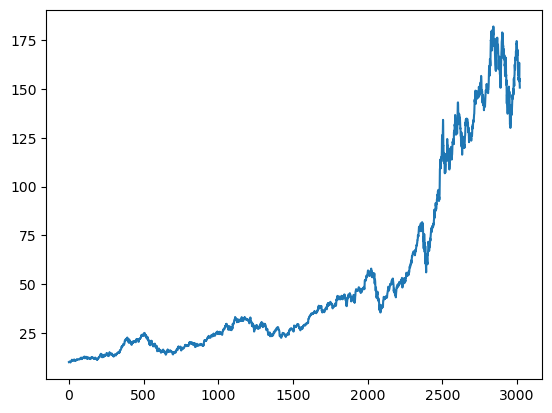

In [119]:
plt.plot(df.Close)

In [120]:
df

,Open,High,Low,Close,Volume
0,9.860000,10.135000,9.851786,10.115357,658677600
1,10.137857,10.262500,10.099643,10.134643,668074400
2,10.096786,10.285000,10.086071,10.276786,585289600
3,10.226071,10.455714,10.214286,10.318571,786116800
4,10.432143,10.483214,10.376786,10.440000,649488000
...,...,...,...,...,...
3015,159.589996,164.259995,159.300003,163.429993,104956000
3016,159.899994,160.539993,153.369995,153.839996,122656600
3017,154.789993,157.100006,153.610001,155.309998,87965400
3018,154.649994,155.240005,151.380005,152.369995,90481100


In [121]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    152.7708
3016    152.6369
3017    152.5258
3018    152.4316
3019    152.3098
Name: Close, Length: 3020, dtype: float64

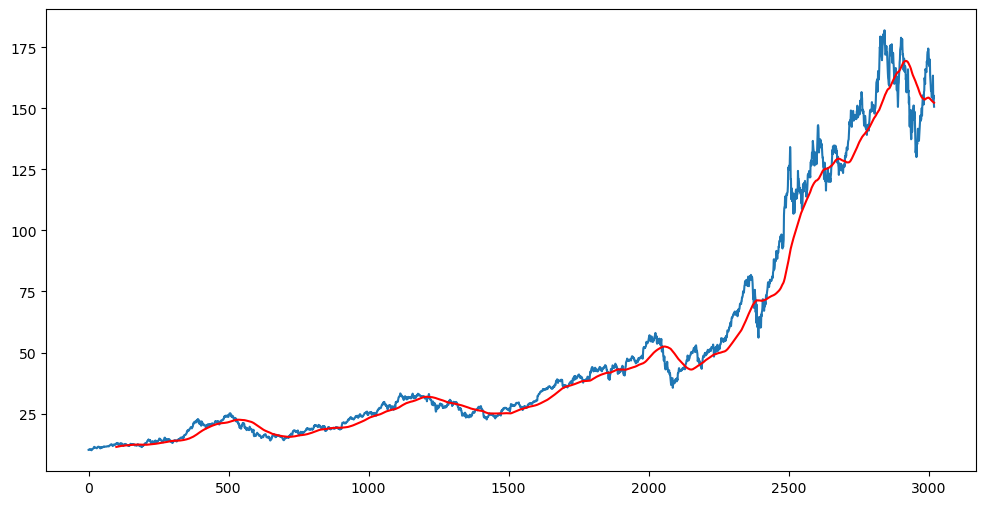

In [122]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [123]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3015    161.04555
3016    161.00505
3017    160.99755
3018    160.95820
3019    160.88520
Name: Close, Length: 3020, dtype: float64

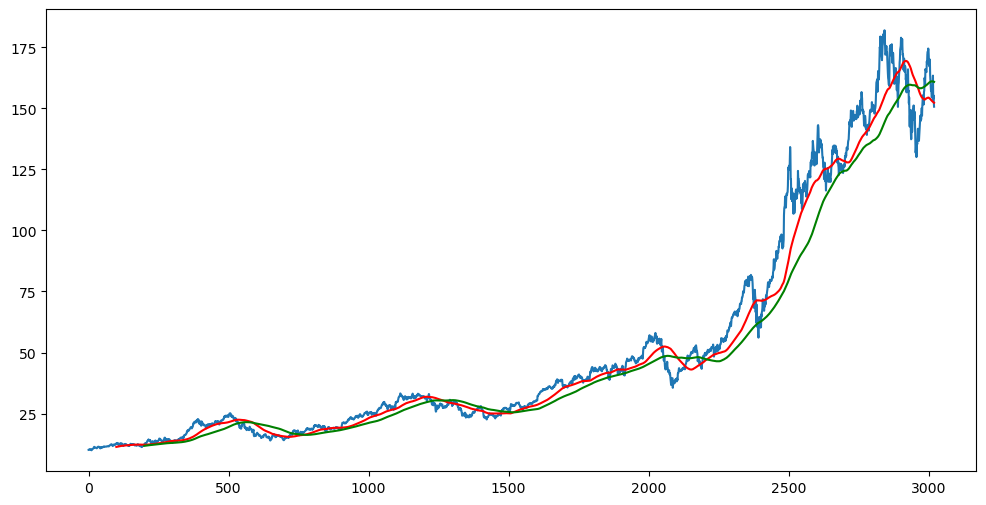

In [124]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [125]:
df.shape

(3020, 5)

In [126]:
#Splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [127]:
data_training.head()

,Close
0,10.115357
1,10.134643
2,10.276786
3,10.318571
4,10.440000


In [128]:
data_testing.head()

,Close
2114,42.544998
2115,42.700001
2116,42.605000
2117,42.732498
2118,43.007500


In [129]:
data_training.tail()

,Close
2109,43.560001
2110,42.735001
2111,42.602501
2112,42.357498
2113,42.722500


In [130]:
data_testing.tail()

,Close
3015,163.429993
3016,153.839996
3017,155.309998
3018,152.369995
3019,150.699997


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [132]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00341047],
       [0.0038117 ],
       [0.00676894],
       ...,
       [0.6792956 ],
       [0.67419839],
       [0.68179214]])

In [133]:
data_training_array.shape

(2114, 1)

In [134]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train) 
    

In [135]:
#MACHINE LEARNING MODEL

In [136]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [137]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
#1 because we are working for only close column otherwise it may not be 1
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

#all above are the 4 layers and now we add dense layer to add all4 layers
#units=1 because we have to predict only one value ie closing price
model.add(Dense(units=1))

In [138]:
model.summary()
#summary of LSTM MODEL

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [ ]:
#Now compile the model and optimiser will be adam
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 20s 234ms/step - loss: 0.0375
Epoch 2/50
63/63 [==============================] - 16s 252ms/step - loss: 0.0081
Epoch 3/50
63/63 [==============================] - 17s 263ms/step - loss: 0.0061
Epoch 4/50
63/63 [==============================] - 16s 248ms/step - loss: 0.0074
Epoch 5/50
63/63 [==============================] - 18s 280ms/step - loss: 0.0060
Epoch 6/50
63/63 [==============================] - 16s 262ms/step - loss: 0.0051
Epoch 7/50
63/63 [==============================] - 17s 266ms/step - loss: 0.0048
Epoch 8/50
63/63 [==============================] - 17s 268ms/step - loss: 0.0048
Epoch 9/50
63/63 [==============================] - 17s 266ms/step - loss: 0.0053
Epoch 10/50
63/63 [==============================] - 16s 258ms/step - loss: 0.0042
Epoch 11/50
63/63 [==============================] - 16s 255ms/step - loss: 0.0046
Epoch 12/50
63/63 [==============================] - 17s 278ms/step - loss: 0.0040
Epoch 13/50
6

In [ ]:
model.save('keras_model.h5')

In [95]:
data_testing.head()

,Close
2114,42.544998
2115,42.700001
2116,42.605000
2117,42.732498
2118,43.007500


In [96]:
data_training.tail(100)

,Close
2014,54.592499
2015,55.007500
2016,54.415001
2017,55.197498
2018,55.547501
...,...
2109,43.560001
2110,42.735001
2111,42.602501
2112,42.357498


In [97]:
#like for predicting the value of 2114 index we need value of previous 100 days
#for this we have to fetch training data to get data of previous 100 days(these 100 values must be append)

past_100_days=data_training.tail(100)

In [98]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\amrit\AppData\Local\Temp\ipykernel_3384\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [99]:
final_df.head()

,Close
0,54.592499
1,55.007500
2,54.415001
3,55.197498
4,55.547501


In [100]:
#Now again i have to apply scaling down because this has not been scale down
input_data=scaler.fit_transform(final_df)
input_data

array([[0.13003328],
       [0.13286677],
       [0.12882138],
       ...,
       [0.81770079],
       [0.79762737],
       [0.78622515]])

In [101]:
#now u see it is scale down between 0 to 1

In [102]:
input_data.shape

(1006, 1)

In [103]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    


In [104]:
#now again convert it into numpy arrays
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [105]:
# Making Predictions

y_predicted=model.predict(x_test)

29/29 [==============================] - 2s 62ms/step


In [106]:
y_predicted.shape

(906, 1)

In [107]:
y_test

array([0.04777672, 0.04883503, 0.04818639, 0.04905691, 0.05093454,
       0.04927882, 0.05253905, 0.05468976, 0.05486046, 0.05578219,
       0.05284628, 0.05595289, 0.05745499, 0.05690876, 0.05518478,
       0.05173679, 0.05243663, 0.06266108, 0.06609201, 0.06745755,
       0.07090551, 0.07498506, 0.07822822, 0.0756849 , 0.07846719,
       0.09029614, 0.08340019, 0.07945721, 0.07612869, 0.07899633,
       0.07942306, 0.08152257, 0.08372451, 0.08846975, 0.09073996,
       0.09132031, 0.09355637, 0.09884784, 0.09782367, 0.09973542,
       0.09688486, 0.09674831, 0.0973628 , 0.09739694, 0.10401981,
       0.10526585, 0.10640949, 0.1114449 , 0.1108987 , 0.10768968,
       0.1060169 , 0.10654605, 0.09982077, 0.11663396, 0.11429546,
       0.11873346, 0.11315182, 0.10355893, 0.1036272 , 0.09990612,
       0.0938636 , 0.0743023 , 0.07932065, 0.08317828, 0.08174448,
       0.079901  , 0.06981308, 0.0758044 , 0.06928394, 0.06395836,
       0.06278058, 0.06151744, 0.06006658, 0.06163694, 0.05612

In [108]:
y_predicted

array([[0.06037475],
       [0.06158613],
       [0.06277746],
       [0.06391324],
       [0.06496312],
       [0.06590568],
       [0.06672645],
       [0.06742032],
       [0.06799313],
       [0.06845818],
       [0.06883372],
       [0.06913699],
       [0.06938575],
       [0.06959961],
       [0.06979638],
       [0.06998821],
       [0.07017791],
       [0.07036245],
       [0.07054834],
       [0.0707531 ],
       [0.07099831],
       [0.07130761],
       [0.07170625],
       [0.07221861],
       [0.07285921],
       [0.07363348],
       [0.07455465],
       [0.07562628],
       [0.07683079],
       [0.07813163],
       [0.07948478],
       [0.080843  ],
       [0.08216721],
       [0.08343019],
       [0.08461931],
       [0.08573587],
       [0.08678977],
       [0.08779752],
       [0.08878574],
       [0.08978088],
       [0.09080639],
       [0.0918743 ],
       [0.0929849 ],
       [0.09413064],
       [0.09529796],
       [0.09648065],
       [0.09767838],
       [0.098

In [109]:
# Now i will scale it up for that i have to find from how much factor i have scale it down
scaler.scale_

array([0.00682769])

In [110]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

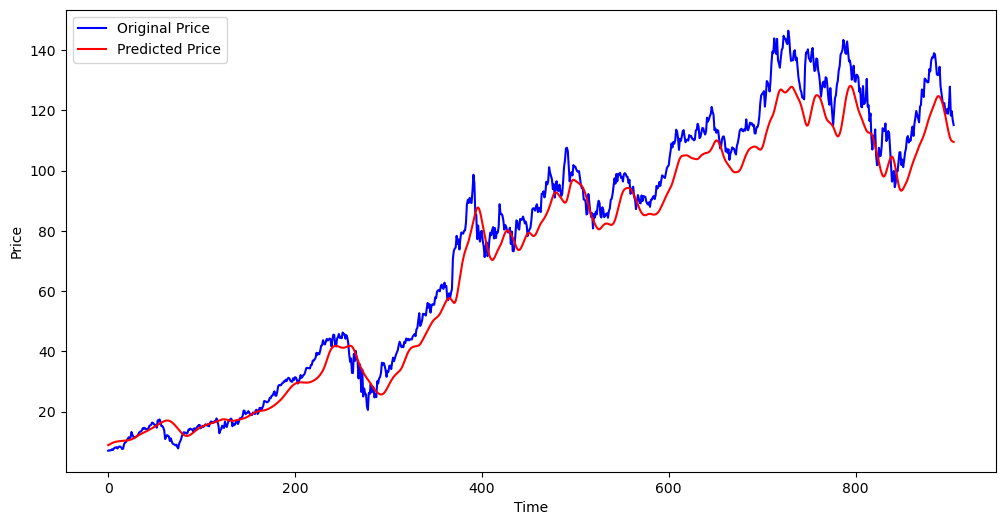

In [111]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [112]:
# We can't say it is perfected prediction of stock but it gives good stock trend